## Using SQLite with Python


### For demonstration. DBProject.py is also provided.

### Conclusions and technical notes are at the end of this file.



In [1]:
import sqlite3
from sqlite3 import Error

print(sqlite3.sqlite_version)
import pandas as pd
from pyjstat import pyjstat
from matplotlib import pyplot as plt

3.36.0


### Using requests to get JSON data from a website.

### Tried to exhaustion to generate a single API-call. Working solution was not found.

In [2]:
#Had to try. Might one day work just that easy.
import requests
import json

test = requests.get('https://pxnet2.stat.fi:443/PXWeb/api/v1/fi/Postinumeroalueittainen_avoin_tieto/2022/paavo_pxt_12f3.px')
test = test.json()

In [3]:
import pprint

In [4]:
#pprint.pprint(test) # Seems that we need different JSON-query.

### Making 5 individual querys from Paavo-API to get wanted information.

#### Interestingly first three work on a almost same syntax. Last two didnt. Both needed individual JSON-querys.
#### Queries are stored in Income22-18 variables.

In [5]:
# JSON-query containing the information from the selected Zip-code areas year 2020 published 2022
session = requests.Session()

query = {
"query": [
    {
      "code": "Postinumeroalue",
      "selection": {
        "filter": "item",
        "values": [
          "00130",
          "02380",
          "16710",
          "41930",
          "54800"
        ]
      }
    },
    {
      "code": "Tiedot",
      "selection": {
        "filter": "item",
        "values": [
          "tr_mtu"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}
url = "https://pxnet2.stat.fi:443/PXWeb/api/v1/fi/Postinumeroalueittainen_avoin_tieto/2022/paavo_pxt_12f3.px"



response = session.post(url, json=query)
income22 = json.loads(response.text)

income22



{'class': 'dataset',
 'label': '5. Talouksien käytettävissä olevat rahatulot muuttujina Postinumeroalue ja Tiedot',
 'source': 'Tulonjakotilasto, Tilastokeskus',
 'updated': '2022-01-25T06:00:00Z',
 'id': ['Postinumeroalue', 'Tiedot'],
 'size': [5, 1],
 'dimension': {'Postinumeroalue': {'label': 'Postinumeroalue',
   'category': {'index': {'00130': 0,
     '02380': 1,
     '16710': 2,
     '41930': 3,
     '54800': 4},
    'label': {'00130': '00130  Kaartinkaupunki (Helsinki)',
     '02380': '02380  Suvisaaristo (Espoo)',
     '16710': '16710  Hollola kk (Hollola)',
     '41930': '41930  Kuohu (Jyväskylä)',
     '54800': '54800  Savitaipale Keskus (Savitaipale)'}},
   'link': {'describedby': [{'extension': {'Postinumeroalue': 'SCALE-TYPE=nominal'}}]}},
  'Tiedot': {'label': 'Tiedot',
   'category': {'index': {'tr_mtu': 0},
    'label': {'tr_mtu': 'Talouksien mediaanitulot, 2020 (TR)'},
    'unit': {'tr_mtu': {'base': 'euro', 'decimals': 0}}}}},
 'value': [49730, 78856, 53072, 44560, 29

In [6]:
# JSON-query containing the information from the selected Zip-code areas year 2019 published 2021.
session = requests.Session()

query = {
"query": [
    {
      "code": "Postinumeroalue",
      "selection": {
        "filter": "item",
        "values": [
          "00130",
          "02380",
          "16710",
          "41930",
          "54800"
        ]
      }
    },
    {
      "code": "Tiedot",
      "selection": {
        "filter": "item",
        "values": [
          "tr_mtu"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}
url = "https://pxnet2.stat.fi:443/PXWeb/api/v1/fi/Postinumeroalueittainen_avoin_tieto/2021/paavo_pxt_12f3.px"

response = session.post(url, json=query)
income21 = json.loads(response.text)

income21

{'class': 'dataset',
 'label': '5. Talouksien käytettävissä olevat rahatulot muuttujina Postinumeroalue ja Tiedot',
 'source': 'Tulonjakotilasto, Tilastokeskus',
 'updated': '2021-01-25T06:00:00Z',
 'id': ['Postinumeroalue', 'Tiedot'],
 'size': [5, 1],
 'dimension': {'Postinumeroalue': {'label': 'Postinumeroalue',
   'category': {'index': {'00130': 0,
     '02380': 1,
     '16710': 2,
     '41930': 3,
     '54800': 4},
    'label': {'00130': '00130  Kaartinkaupunki (Helsinki)',
     '02380': '02380  Suvisaaristo (Espoo)',
     '16710': '16710  Hollola kk (Hollola)',
     '41930': '41930  Kuohu (Jyväskylä)',
     '54800': '54800  Savitaipale Keskus (Savitaipale)'}},
   'link': {'describedby': [{'extension': {'Postinumeroalue': 'SCALE-TYPE=nominal'}}]}},
  'Tiedot': {'label': 'Tiedot',
   'category': {'index': {'tr_mtu': 0},
    'label': {'tr_mtu': 'Talouksien mediaanitulot, 2019 (TR)'},
    'unit': {'tr_mtu': {'base': 'euro', 'decimals': 0}}}}},
 'value': [53044, 76084, 50821, 44636, 29

In [7]:
#JSON-query containing the information from the selected Zip-code areas year 2018 published 2020.
session = requests.Session()

query = {
"query": [
    {
      "code": "Postinumeroalue",
      "selection": {
        "filter": "item",
        "values": [
          "00130",
          "02380",
          "16710",
          "41930",
          "54800"
        ]
      }
    },
    {
      "code": "Tiedot",
      "selection": {
        "filter": "item",
        "values": [
          "tr_mtu"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}
url = "https://pxnet2.stat.fi:443/PXWeb/api/v1/fi/Postinumeroalueittainen_avoin_tieto/2020/paavo_pxt_12f3.px"

response = session.post(url, json=query)
income20 = json.loads(response.text)

income20 # Dict. from JSON-query containing the information from the selected Zip-code areas year 2018 published 2020.

{'class': 'dataset',
 'label': '5. Talouksien käytettävissä olevat rahatulot muuttujina Postinumeroalue ja Tiedot',
 'source': 'Tulonjaon kokonaistilasto, Tilastokeskus',
 'updated': '2020-01-27T06:00:00Z',
 'id': ['Postinumeroalue', 'Tiedot'],
 'size': [5, 1],
 'dimension': {'Postinumeroalue': {'label': 'Postinumeroalue',
   'category': {'index': {'00130': 0,
     '02380': 1,
     '16710': 2,
     '41930': 3,
     '54800': 4},
    'label': {'00130': '00130  Kaartinkaupunki (Helsinki)',
     '02380': '02380  Suvisaaristo (Espoo)',
     '16710': '16710  Hollola kk (Hollola)',
     '41930': '41930  Kuohu (Jyväskylä)',
     '54800': '54800  Savitaipale Keskus (Savitaipale)'}}},
  'Tiedot': {'label': 'Tiedot',
   'category': {'index': {'tr_mtu': 0},
    'label': {'tr_mtu': 'Talouksien mediaanitulot, 2017 (TR)'},
    'unit': {'tr_mtu': {'base': 'euro', 'decimals': 0}}}}},
 'value': [48082, 70733, 48128, 44458, 27498],
 'role': {'metric': ['Tiedot']},
 'version': '2.0',
 'extension': {'px': 

In [8]:
# Needs new query from Paavo-API because of the different URL.
# JSON-query containing the information from the selected Zip-code areas from 2016 published 2019.
session = requests.Session()

query = {

  "query": [
    {
      "code": "Postinumeroalue",
      "selection": {
        "filter": "item",
        "values": [
          "00130",
          "02380",
          "16710",
          "41930",
          "54800"
        ]
      }
    },
    {
      "code": "Tiedot",
      "selection": {
        "filter": "item",
        "values": [
          "Tr_mtu"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

url = "https://pxnet2.stat.fi:443/PXWeb/api/v1/fi/Postinumeroalueittainen_avoin_tieto/2019/paavo_5_tr_2019.px"


response = session.post(url, json=query)
income19 = json.loads(response.text)

income19 # JSON-query containing the information from the selected Zip-code areas from 2016 published 2019.

{'class': 'dataset',
 'label': 'Paavo - Postinumeroalueittainen avoin tieto 2019 muuttujina Postinumeroalue ja Tiedot',
 'source': 'Tilastokeskus',
 'updated': '2019-01-15T12:26:00Z',
 'id': ['Postinumeroalue', 'Tiedot'],
 'size': [5, 1],
 'dimension': {'Postinumeroalue': {'label': 'Postinumeroalue',
   'category': {'index': {'00130': 0,
     '02380': 1,
     '16710': 2,
     '41930': 3,
     '54800': 4},
    'label': {'00130': '00130 Kaartinkaupunki   (Helsinki )',
     '02380': '02380 Suvisaaristo   (Espoo )',
     '16710': '16710 Hollola kk   (Hollola )',
     '41930': '41930 Kuohu   (Jyväskylä )',
     '54800': '54800 Savitaipale Keskus   (Savitaipale )'}}},
  'Tiedot': {'label': 'Tiedot',
   'category': {'index': {'Tr_mtu': 0},
    'label': {'Tr_mtu': 'Talouksien mediaanitulot, 2016 (TR)'}}}},
 'value': [45999, 68621, 46133, 41430, 27853],
 'role': {},
 'version': '2.0',
 'extension': {'px': {'decimals': 0}}}

In [9]:
# JSON-query containing the information from the selected Zip-code areas from 2015 published 2018.
session = requests.Session()

query = {

"query": [
    {
      "code": "Postinumeroalue",
      "selection": {
        "filter": "item",
        "values": [
          "00130",
          "02380",
          "16710",
          "41930",
          "54800"
        ]
      }
    },
    {
      "code": "Tiedot",
      "selection": {
        "filter": "item",
        "values": [
          "Tr_mtu"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


url = "https://pxnet2.stat.fi:443/PXWeb/api/v1/fi/Postinumeroalueittainen_avoin_tieto/2018/paavo_5_tr_2018.px"


response = session.post(url, json=query)
income18 = json.loads(response.text)

income18 # JSON-query containing the information from the selected Zip-code areas from 2015 published 2018.

{'class': 'dataset',
 'label': 'Paavo - Postinumeroalueittainen avoin tieto 2018 muuttujina Postinumeroalue ja Tiedot',
 'source': 'Tilastokeskus',
 'updated': '2018-01-22T08:54:00Z',
 'id': ['Postinumeroalue', 'Tiedot'],
 'size': [5, 1],
 'dimension': {'Postinumeroalue': {'label': 'Postinumeroalue',
   'category': {'index': {'00130': 0,
     '02380': 1,
     '16710': 2,
     '41930': 3,
     '54800': 4},
    'label': {'00130': '00130 Kaartinkaupunki   (Helsinki )',
     '02380': '02380 Suvisaaristo   (Espoo )',
     '16710': '16710 Hollola kk   (Hollola )',
     '41930': '41930 Kuohu   (Jyväskylä )',
     '54800': '54800 Savitaipale Keskus   (Savitaipale )'}}},
  'Tiedot': {'label': 'Tiedot',
   'category': {'index': {'Tr_mtu': 0},
    'label': {'Tr_mtu': 'Talouksien mediaanitulot, 2015 (TR)'}}}},
 'value': [44641, 67348, 44233, 41925, 27529],
 'role': {},
 'version': '2.0',
 'extension': {'px': {'decimals': 0}}}

### Creating the SQLite-database

In [10]:
def create_connection(incomesdb):
    """ create a database connection to the SQLite database
        specified by incomesdb
    :param incomesdb: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect("incomesdb.db")
        return conn
    except Error as e:
        print(e)

    return conn


In [11]:
def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

In [12]:
def create_sql_database(database):
    
    #Create tables
    sql_create_income22_table = """ CREATE TABLE IF NOT EXISTS income2022 (
                                        zip text PRIMARY KEY,
                                        area text,
                                        income integer 
                                        
                                    ); """

    

    
    sql_create_income21_table = """ CREATE TABLE IF NOT EXISTS income2021 (
                                        zip text PRIMARY KEY,
                                        area string,
                                        income text 
                                        
                                    ); """
     
    sql_create_income20_table = """ CREATE TABLE IF NOT EXISTS income2020 (
                                        zip text PRIMARY KEY,
                                        area text,
                                        income integer
                                        
                                    ); """
        
    sql_create_income19_table = """ CREATE TABLE IF NOT EXISTS income2019 (
                                        zip text PRIMARY KEY,
                                        area text,
                                        income integer
                                        
                                    ); """
    
    sql_create_income18_table = """ CREATE TABLE IF NOT EXISTS income2018 (
                                        zip text PRIMARY KEY,
                                        area text ,
                                        income integer
                                        
                                    ); """

   
    # create a database connection
    conn = create_connection(database)

    # create tables
    if conn is not None:
        
        create_table(conn, sql_create_income22_table)

        create_table(conn, sql_create_income21_table)
        
        create_table(conn, sql_create_income20_table)
        
        create_table(conn, sql_create_income19_table)
        
        create_table(conn, sql_create_income18_table)
    else:
        print("Error! cannot create the database connection.")


### Converting the Python Dict to variables supported in SQLite

In [13]:
def parser(income, zip_code_count = 5): 
    """ Function parses JSON-dict
    :param income: Nested dict from JSON-query
    :param zip_code_count number of zip-codes used. Default value: 5
    :return: df_temp which contains parsed names and values for selected year.
    """
    
    
    zip_codes = income['dimension']['Postinumeroalue']['category']['index'].keys()
    zip_label = income['dimension']['Postinumeroalue']['category']['label'].values()

    value = income['value']
    
    #Convert dict_keys and dict_values to string-variables.
    zip_codes = [str(i) for i in zip_codes]
    zip_label = [str(i) for i in zip_label]

    #Iterate through the list and combine information to wanted list.
    df_temp = []
    for i in range(zip_code_count):
        temp = []
        temp.append(zip_codes[i])
        temp.append(zip_label[i])
        temp.append(value[i])
        df_temp.append(temp)


    return df_temp

### Inserting the JSON-query to the tables

In [14]:
def insert_query(database, year, income):
    
    conn = sqlite3.connect(database)

    cursor = conn.cursor()

    sql_ = "INSERT INTO income%s VALUES (?,?,?)" %year


    for i in range(5):

        # This is the q-mark style:
        cursor.execute(sql_,(income[i][0], income[i][1], income[i][2]))

    conn.commit()
    


In [15]:
def plotter(dfall):
    value = [] # Empty lists in which the indexes are stored
    #name = []
    zip_codes = []
    
    years = list(dfall.keys()) #Selecting a dataframe-key (years)
    df = dfall.get(years[0]) #Dataframe for years
    
    # Loop to iterate over keys and appending them to the zip_codes list
    for l in df:
        zip_codes.append(l[0])
        
    #While-loop to ask the wanted zip_code area
    while (1):
        i = input("Which zip-code area? Available: 00130, 02380, 16710, 41930 and 54800. Selected: ") 
        
        if i in zip_codes: #Checks if the input zip-code can be found
            print("OK")
            j = zip_codes.index(i) #Saving the index of wanted zip-code to check where it is stored in the dataframe
            break;
        else:
            print("not available")
    
    # Loop to the select the wanted year and append it on the name-list
    for key in dfall:
        x = dfall.get(key)
        x = x[j]
        value.append(x[2])
     
    name = x[1]
        
    #Plt-plot to show the income-growth over the years
    plt.plot(years, value)
    plt.title(name)
    plt.xlabel("year")
    plt.ylabel("yearly median income (eur)")
    plt.show()
    
    #Calculating the average change in selected areas income
    average =(value[-1] / value[0]) * 100

    print("Household median income growth during five years in area %s has been %f percentage" %(name,(average - 100)))

### Main

#### Calls all functions and generates the results

Which zip-code area? Available: 00130, 02380, 16710, 41930 and 54800. Selected: 16710
OK


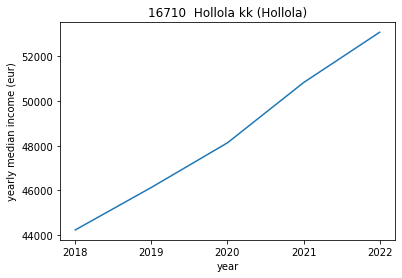

Household median income growth during five years in area 16710  Hollola kk (Hollola) has been 19.982818 percentage


In [16]:
def main():
    database = r"..\incomesdb.db"
    
    #Call to create SQLite-database
    create_sql_database(database)
    
    #Call to parser and storing the individual JSON-querys to designated variables
    df22 = parser(income22)
    df21 = parser(income21)
    df20 = parser(income20)
    df19 = parser(income19)
    df18 = parser(income18)
    
    #Denerates the "dfall"-dictionary where years are stored as keys. Inserts wanted information to database and plots the results.
    dfall = {"2018": df18,"2019": df19, "2020": df20,"2021": df21, "2022": df22}
    plotter(dfall)
    for i in range(5):
        year = list(dfall.keys())[i]
        income = dfall.get(year)

        insert_query(database,year, income)
    
    
    #get_posts() #Helper function to check the tables contents
    
if __name__ == '__main__':
    main()

In [ ]:
#def get_posts(year): #Not needed helper function used as double cheking the database's tables and their contents
    #cursor.execute("SELECT * FROM income%s" %year)
    #print(cursor.fetchall())

#get_posts()

## Conclusions

Income growth has been highest in area <mark>16710  Hollola kk (Hollola) observed growth has been 19.982818 percent.</mark> Growth has been steady in the past five years.

Some other areas such as Kaartinkaupunki the growth has been recently declining. It might something to do with pandemic when
People are looking for more spacious apartments. Also, there has been growth in smaller areas during the same time which can additionally support the hypothesis that people are moving away from city centers where apartments can be quite small.


### Technical notes

There is a possibility to automate this script to update every March. It will need a designated function which checks the time and generates new JSON-query. This function will also generate a new SQLite-table and update the Zip-code index from five to six. However, the major design flaw of this script is that there are five different JSON-queries which affect in part for some of the script's design. Paavo-APi uses distinct urls to get the wanted queries and due to writers inexperience using the API, a solution for a single API call to get the wanted information was not found. This should be fixed first. Then update the code to get rid of five different dataframes and instead use only one. After these steps, the designated updater-function can be constructed properly. Lastly, Pandas Dataframe could have been used to store the JSON-querys. This is something that must be learned for the future.  